# The Efficient Frontier: Markowitz portfolio optimization

 In this notebook we optimize a portfolio of AAPL, AMZN, TSLA and IBM
 

## Portfolio Optimization Using Monte Carlo Simulation

In [2]:
#Mushfiqur Rahman [Mushfiq] 
#import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas_datareader
import datetime

In [5]:
import pandas_datareader.data as web

In [6]:
#get data

In [7]:
start = datetime.datetime(2012, 1, 3)
end = datetime.date.today()
apple_raw = web.DataReader("AAPL", 'morningstar', start, end)

In [8]:
#using only the closing prices

In [9]:
aapl = apple_raw.loc['AAPL']['Close']

In [10]:
aapl.head()

Date
2012-01-03    58.7471
2012-01-04    59.0629
2012-01-05    59.7186
2012-01-06    60.3429
2012-01-09    60.2471
Name: Close, dtype: float64

In [11]:
#Loading the price from ibm, tesla, amazon

In [12]:
amzn_raw = web.DataReader("AMZN", 'morningstar', start, end)
amzn = amzn_raw.loc['AMZN']['Close']

In [13]:
tsla_raw = web.DataReader("TSLA", 'morningstar', start, end)
tsla = tsla_raw.loc['TSLA']['Close']

In [14]:
ibm_raw = web.DataReader("IBM", 'morningstar', start, end)
ibm = ibm_raw.loc['IBM']['Close']

In [15]:
stocks = pd.concat([aapl,tsla,ibm,amzn],axis=1)
stocks.columns = ['aapl','tsla','ibm','amzn']

In [16]:
stocks.head()

,aapl,tsla,ibm,amzn
Date,,,,
2012-01-03,58.7471,28.08,186.30,179.03
2012-01-04,59.0629,27.71,185.54,177.51
2012-01-05,59.7186,27.12,184.66,177.61
2012-01-06,60.3429,26.91,182.54,182.61
2012-01-09,60.2471,27.25,181.59,178.56


In [17]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl    0.000803
tsla    0.001857
ibm    -0.000091
amzn    0.001494
dtype: float64

In [18]:
#Find correlation
stocks.pct_change(1).corr()

,aapl,tsla,ibm,amzn
aapl,1.000000,0.212639,0.286771,0.274615
tsla,0.212639,1.000000,0.191472,0.275054
ibm,0.286771,0.191472,1.000000,0.250301
amzn,0.274615,0.275054,0.250301,1.000000


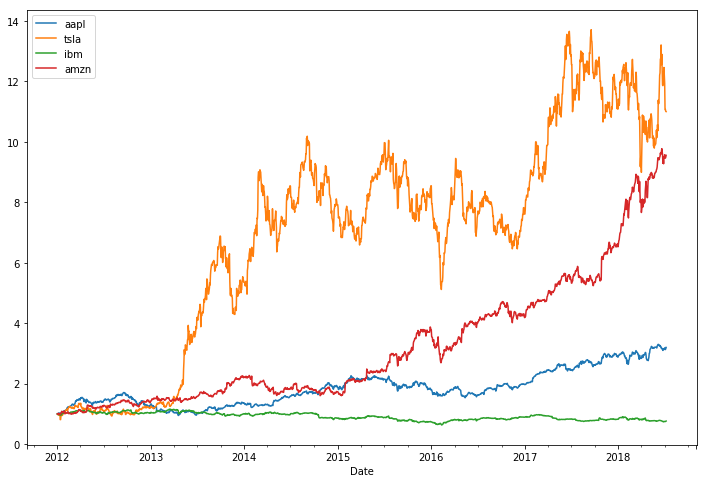

In [19]:
#Normalize
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot(figsize=(12,8))

In [20]:
#Calculating daily returns using pandas method
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,tsla,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005376,-0.013177,-0.004079,-0.008490
2012-01-05,0.011102,-0.021292,-0.004743,0.000563
2012-01-06,0.010454,-0.007743,-0.011481,0.028152
2012-01-09,-0.001588,0.012635,-0.005204,-0.022178


In [21]:
#Calculating log returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,tsla,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005361,-0.013264,-0.004088,-0.008526
2012-01-05,0.011041,-0.021522,-0.004754,0.000563
2012-01-06,0.010400,-0.007773,-0.011547,0.027763
2012-01-09,-0.001589,0.012556,-0.005218,-0.022428


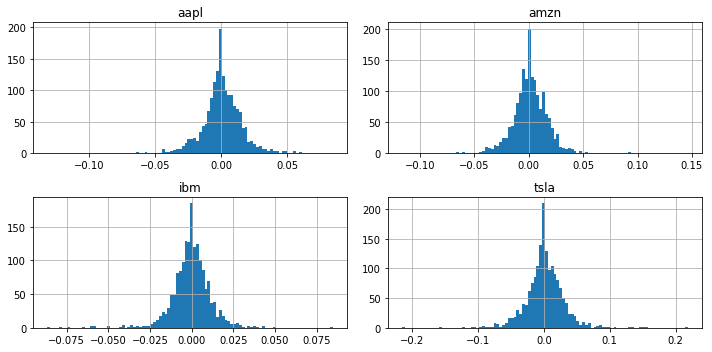

In [22]:
log_ret.hist(bins=100,figsize=(10,5));
plt.tight_layout()

In [23]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1698.0,0.000685,0.015381,-0.131876,-0.006417,0.000000,0.008697,0.085023
tsla,1698.0,0.001412,0.029731,-0.214772,-0.012553,0.000000,0.016616,0.218355
ibm,1698.0,-0.000158,0.011614,-0.086419,-0.005560,0.000000,0.005616,0.084934
amzn,1698.0,0.001329,0.018056,-0.116503,-0.007072,0.000533,0.010563,0.146225


In [24]:
#252 trading days
log_ret.mean() * 252

aapl    0.172607
tsla    0.355881
ibm    -0.039797
amzn    0.334971
dtype: float64

In [25]:
# Compute pairwise covariance of columns
log_ret.cov()

,aapl,tsla,ibm,amzn
aapl,0.000237,0.000098,0.000051,0.000077
tsla,0.000098,0.000884,0.000067,0.000151
ibm,0.000051,0.000067,0.000135,0.000053
amzn,0.000077,0.000151,0.000053,0.000326


In [26]:
log_ret.cov()*252 # multiply by days

,aapl,tsla,ibm,amzn
aapl,0.059619,0.024706,0.012831,0.019280
tsla,0.024706,0.222749,0.016843,0.038174
ibm,0.012831,0.016843,0.033993,0.013291
amzn,0.019280,0.038174,0.013291,0.082160


In [27]:
num_runs = 10000

all_weights = np.zeros((num_runs,len(stocks.columns)))
ret_arr = np.zeros(num_runs)
vol_arr = np.zeros(num_runs)
sharpe_arr = np.zeros(num_runs)

for ind in range(num_runs):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [28]:
sharpe_arr.max()

1.2866285835671014

In [29]:
sharpe_arr.argmax()

9984

In [30]:
all_weights[9642,:]

array([0.20252314, 0.47533002, 0.0339339 , 0.28821295])

In [31]:
print(stocks.columns)

Index(['aapl', 'tsla', 'ibm', 'amzn'], dtype='object')


In [32]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

print('Return with Maximum SR')
print(max_sr_ret)
print('Volality with Maximum SR')
print(max_sr_vol)

Return with Maximum SR
0.2991782388514858
Volality with Maximum SR
0.23252882974357053


# Plotting the data

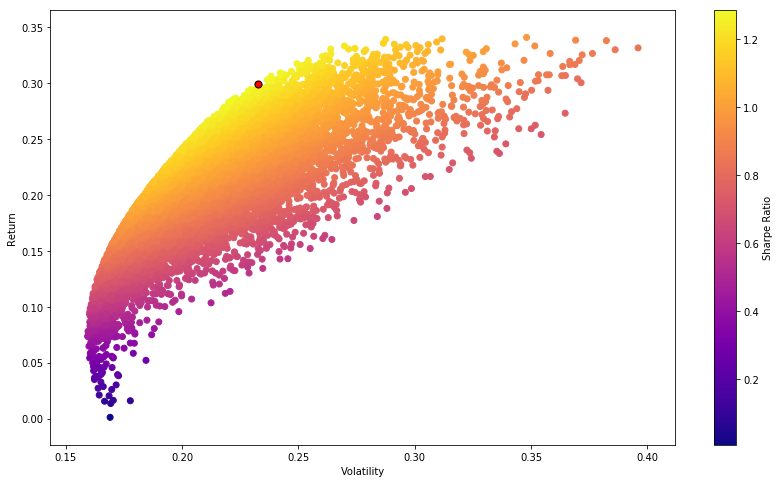

In [33]:
plt.figure(figsize=(14,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

## The Efficient Frontier

In [34]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [35]:
from scipy.optimize import minimize

In [36]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [37]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [38]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [39]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,150)

In [40]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] ##Grab the 2nd item which is volatility 

In [41]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return. 
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

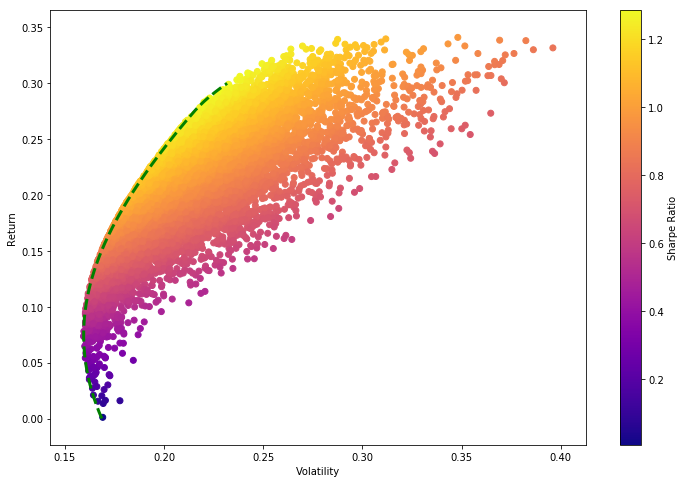

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)